## Step 0. configurations

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Step 1. reading data and importing libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("../data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 2. understanding the data

In [4]:
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=569, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Step 3. Visualizing

In [9]:
numerical_columns = df.select_dtypes(include="number").columns \
    .drop("id")

numerical_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
categorical_columns = df.select_dtypes(include="object").columns

categorical_columns

Index(['diagnosis'], dtype='object')

In [11]:
boolean_columns = df.select_dtypes(include="bool").columns
boolean_columns

Index([], dtype='object')

### **Distributions**

Numerical columns

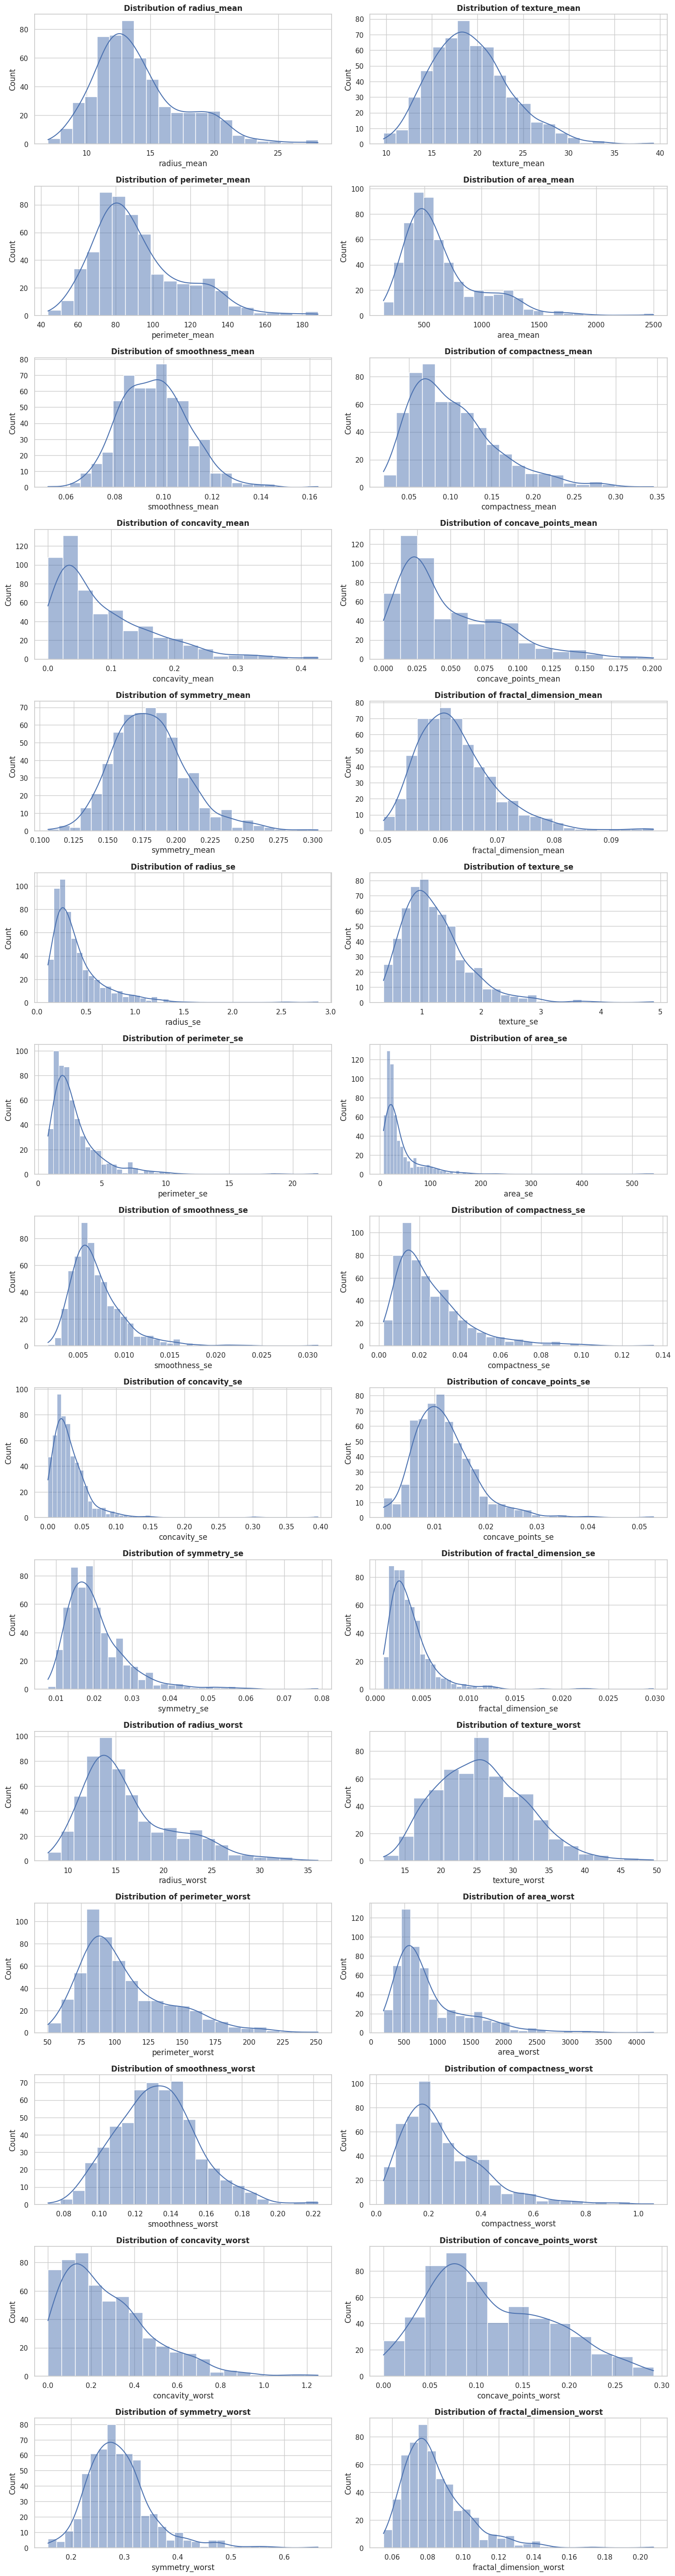

In [12]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

Categorical columns

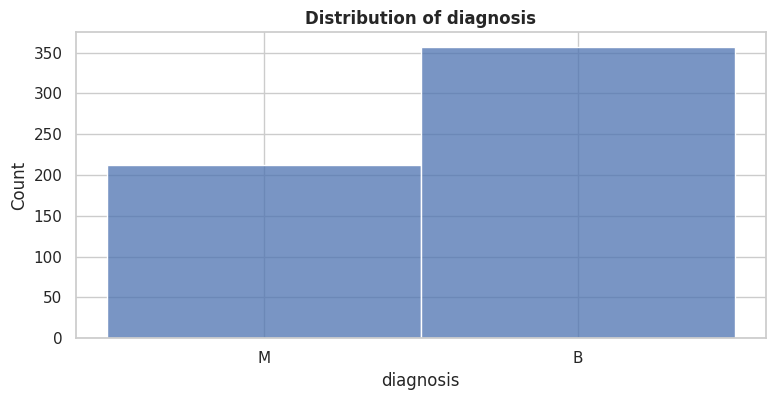

In [13]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.histplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

Boolean columns

In [14]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(boolean_columns):
    plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
    sns.countplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

<Figure size 1500x6000 with 0 Axes>

### **Correlations**

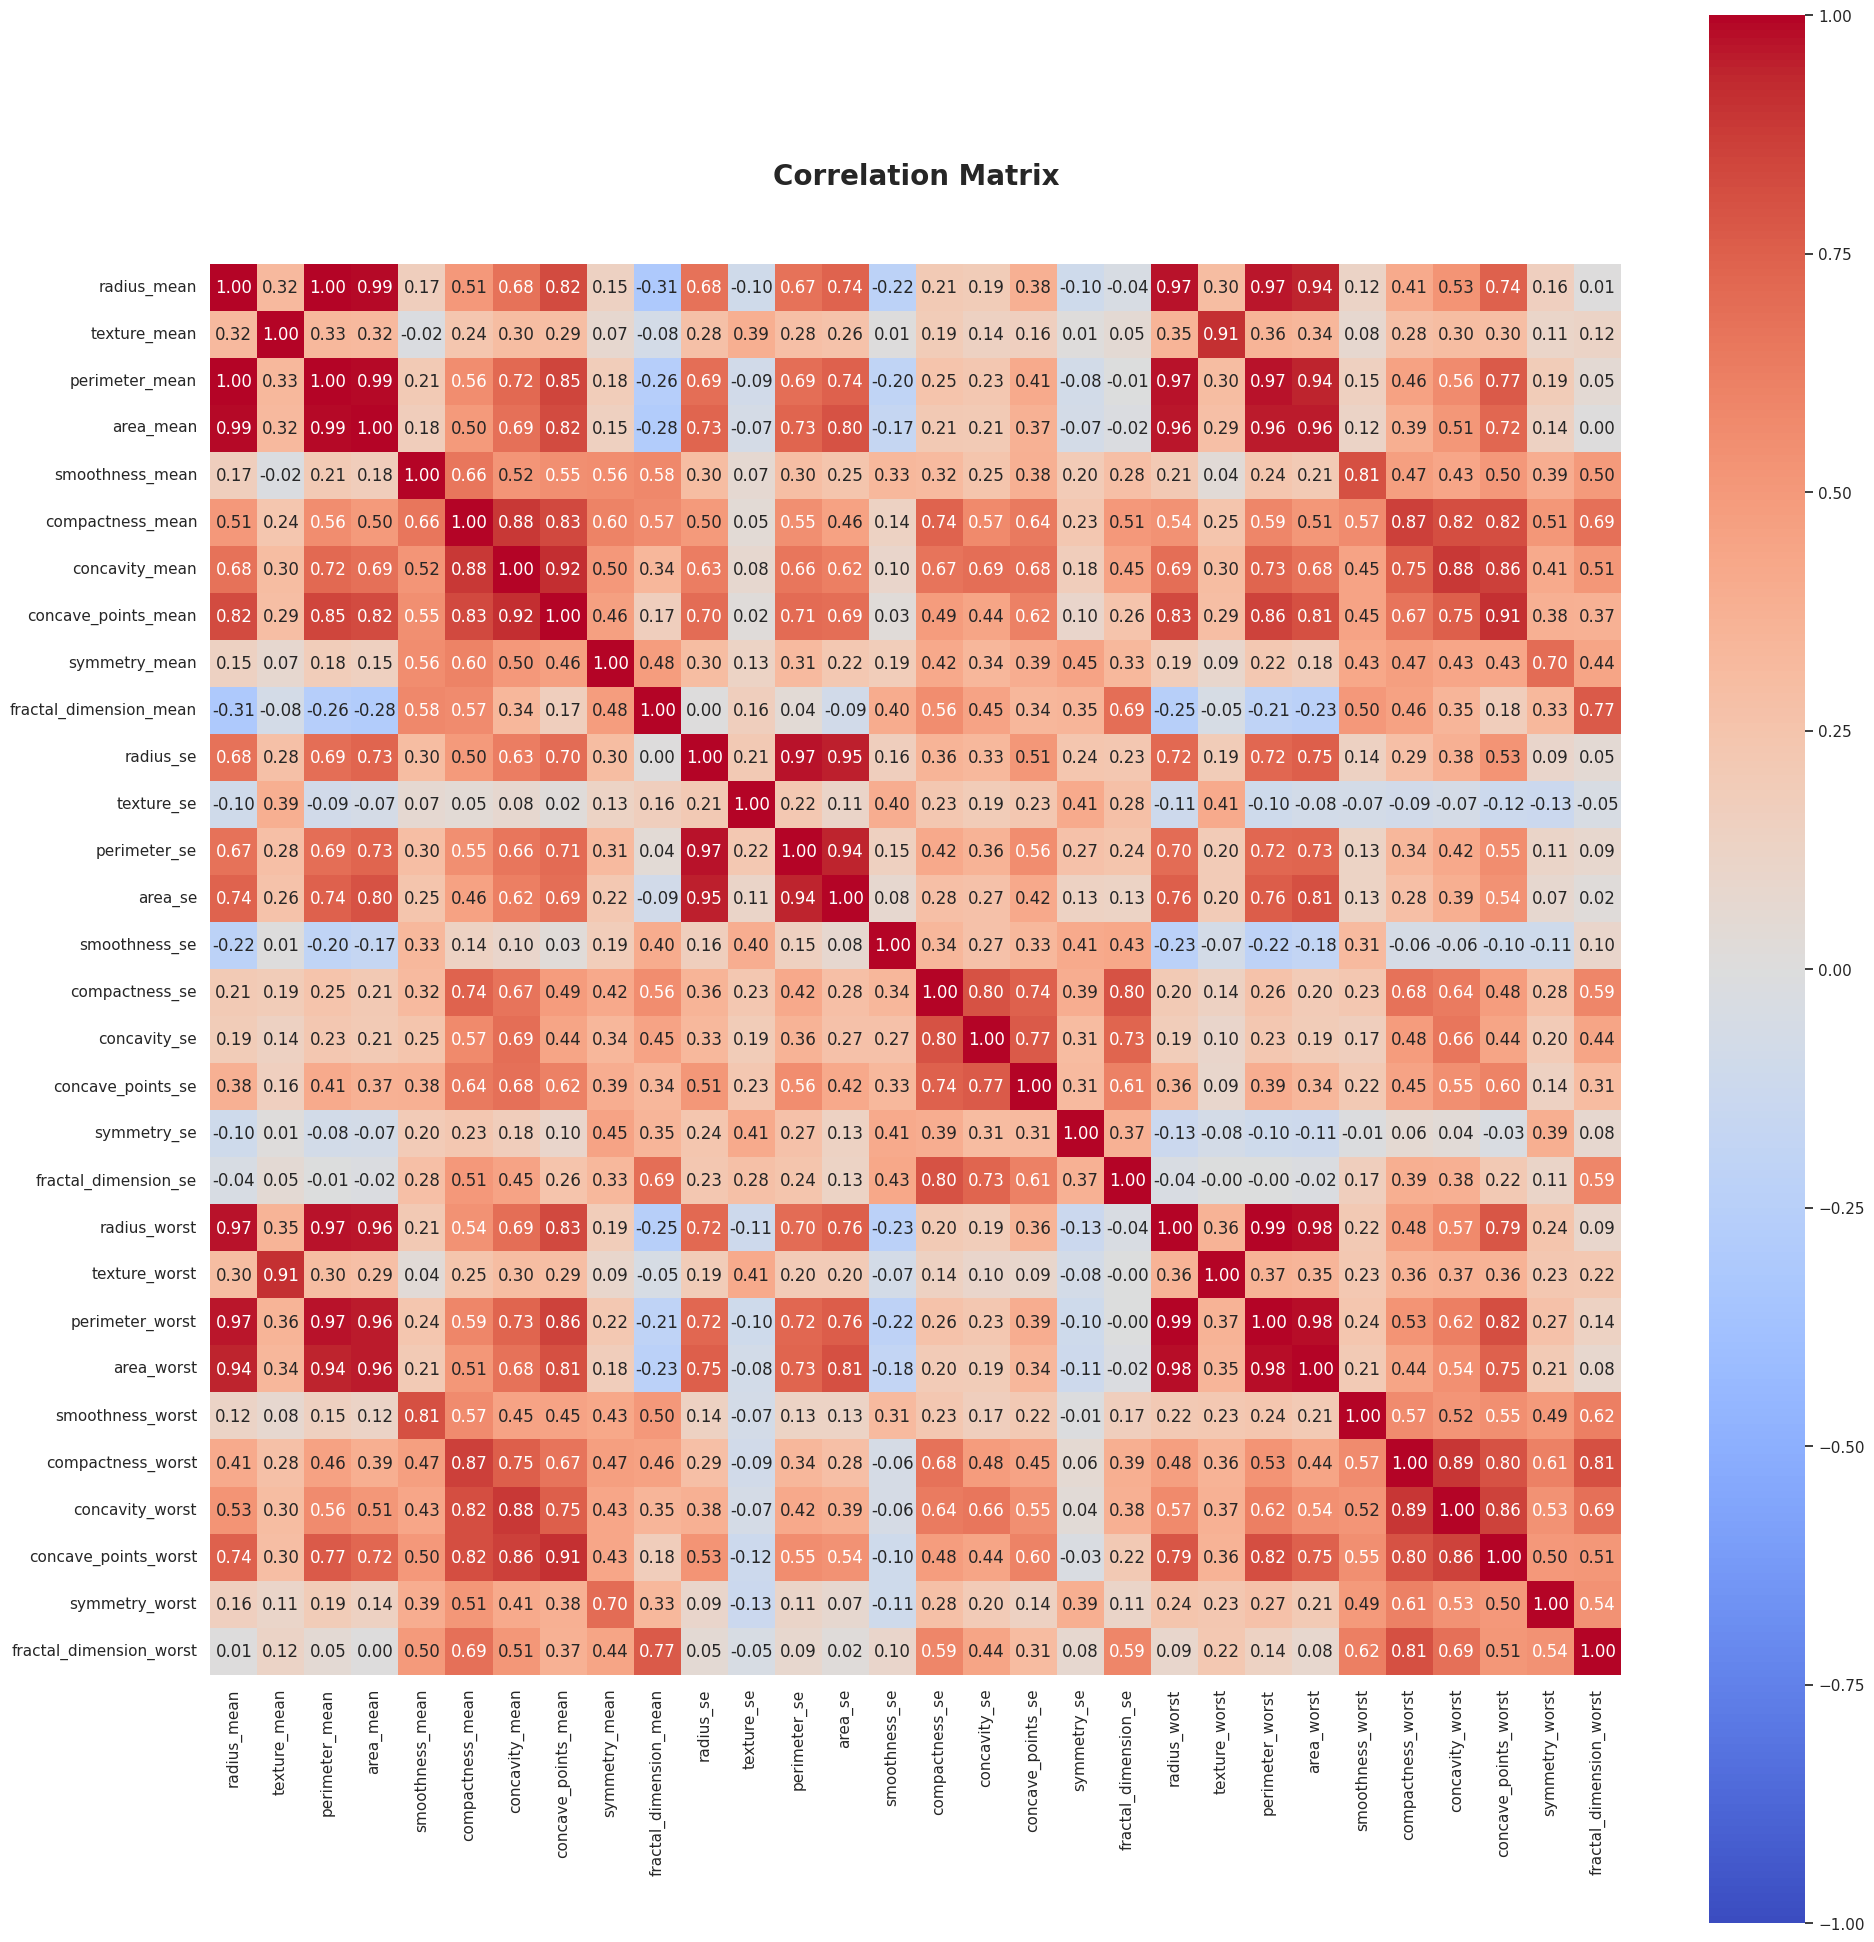

In [15]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, 
    annot=True, 
    square=True, 
    cmap="coolwarm", 
    fmt=".2f",
    vmin=-1, vmax=1
)
plt.title("Correlation Matrix", fontweight="bold", fontsize=20, y=1.05)

plt.tight_layout()
plt.show()

## Step 4: Modelling

The goal for this dataset is to create a classification model that can predict the column `diagnosis`

### Import modelling libraries

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.callbacks import EarlyStopping

2024-10-04 21:45:37.781863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 21:45:37.791779: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 21:45:37.794333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 21:45:37.802646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-04 21:45:38.797486: W tensorflow/compiler/tf2

### train_test_split

In [17]:
# # Use LabelEncoder to convert 'B' to 0 and 'M' to 1
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [18]:
X = df.drop(columns=["id", "diagnosis"])    # ID won't help in making a model
y = df["diagnosis"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


scaler = MinMaxScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)


In [20]:
# Use to_categorical to one-hot-encode 'B' and 'M' to 

from tensorflow.python.keras.utils.np_utils import to_categorical
y_train_class = to_categorical(y_train)

### **Sequential()** with `Dropout()` and `BatchNormalization()`

#### 1. Architecture

In [21]:
def get_model():

    model = Sequential()
    n_cols = X_train_stand.shape[1]

    model.add(Dense(100, activation="relu", input_shape=(n_cols,)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(1, activation="sigmoid"))

    return model

model = get_model()

I0000 00:00:1728071139.431930   36175 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-04 21:45:39.451996: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


#### 2. Compile

In [22]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#### 3. Fit the model

In [23]:
from tensorflow.keras.callbacks import Callback


class EpochLogger(Callback):
	def on_epoch_end(self, epoch, logs=None):
		if epoch % 50 == 0:
			print(f"Epoch {epoch}: loss - {logs['loss']:.4f}, accuracy - {logs['accuracy']:.4f}, val_loss - {logs['val_loss']:.4f}, val_accuracy - {logs['val_accuracy']:.4f}")

# Callbacks
early_stopping = EarlyStopping(patience=500, restore_best_weights=True, verbose=1, monitor="val_loss")
epoch_logger = EpochLogger()



fit = model.fit(X_train, y_train, 
                validation_split=0.2,
                epochs=500,
                batch_size=32,
                callbacks=[
					early_stopping,
					epoch_logger],
                verbose=0)

Epoch 0: loss - 0.4702, accuracy - 0.7720, val_loss - 1.9323, val_accuracy - 0.3626
Epoch 50: loss - 0.1394, accuracy - 0.9313, val_loss - 0.3295, val_accuracy - 0.8791
Epoch 100: loss - 0.1501, accuracy - 0.9451, val_loss - 0.2774, val_accuracy - 0.9121
Epoch 150: loss - 0.1686, accuracy - 0.9203, val_loss - 0.4803, val_accuracy - 0.8571
Epoch 200: loss - 0.0883, accuracy - 0.9725, val_loss - 0.2988, val_accuracy - 0.9121
Epoch 250: loss - 0.1260, accuracy - 0.9505, val_loss - 0.3505, val_accuracy - 0.9011
Epoch 300: loss - 0.1231, accuracy - 0.9368, val_loss - 0.2561, val_accuracy - 0.9011
Epoch 350: loss - 0.1236, accuracy - 0.9505, val_loss - 0.3479, val_accuracy - 0.9011
Epoch 400: loss - 0.0808, accuracy - 0.9670, val_loss - 0.2587, val_accuracy - 0.9231
Epoch 450: loss - 0.1608, accuracy - 0.9341, val_loss - 0.3852, val_accuracy - 0.9011


#### 4. Evaluation

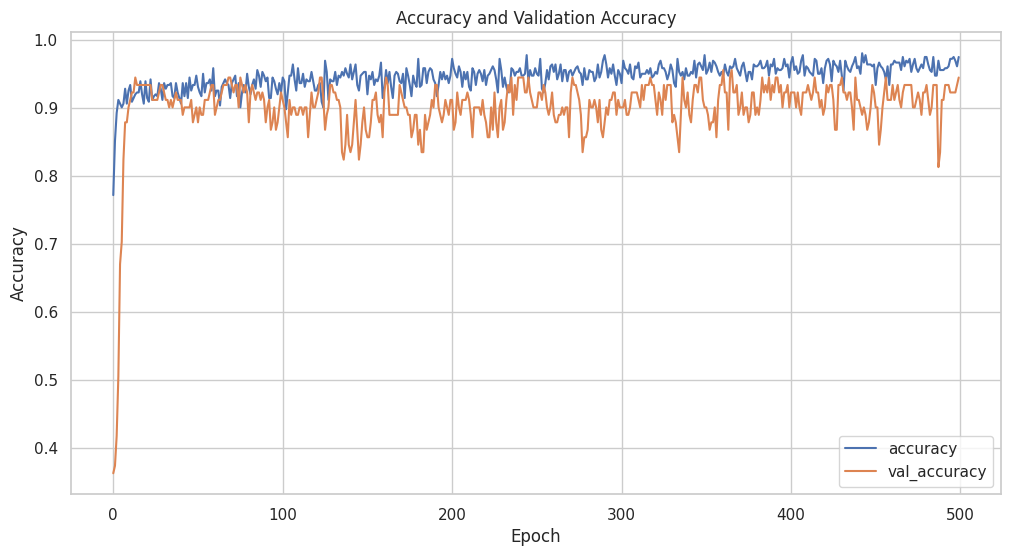

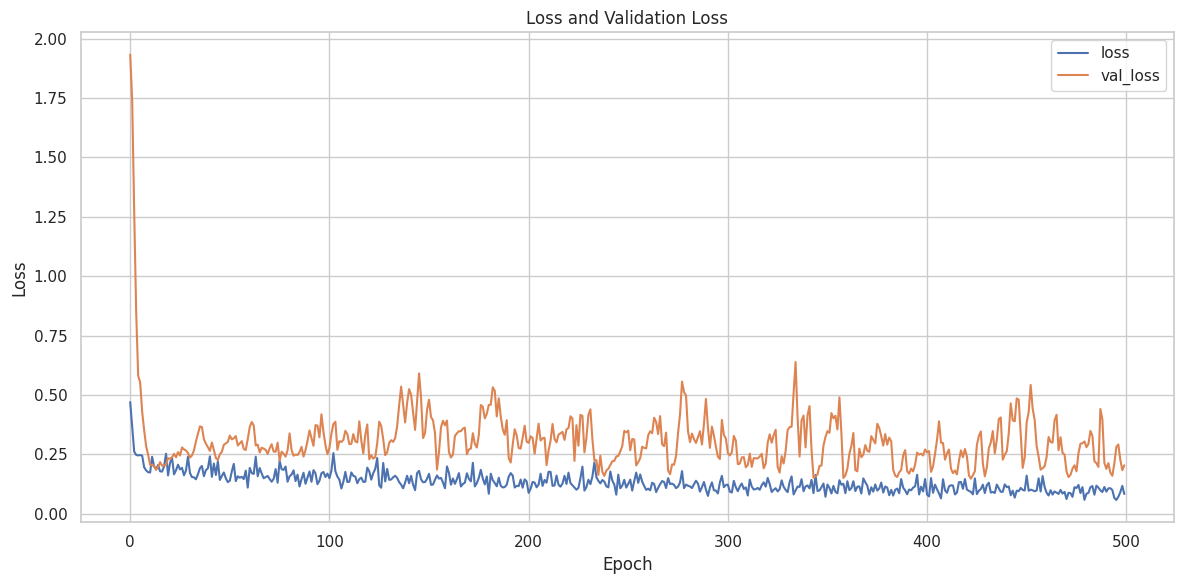

In [24]:
plt.figure(figsize=(12, 6))

# Plot accuracy and val_accuracy
plt.plot(fit.history['accuracy'], label='accuracy')
plt.plot(fit.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy and Validation Accuracy')
plt.legend()

# Plot loss and val_loss

plt.figure(figsize=(12, 6))
plt.plot(fit.history['loss'], label='loss')
plt.plot(fit.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Step 5: Evaluation

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        69
           1       0.97      0.78      0.86        45

    accuracy                           0.90       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114


Confusion matrix:
[[68  1]
 [10 35]]
